# Bài 2

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/DS102/BTTH Buổi 2

/content/drive/MyDrive/Colab Notebooks/DS102/BTTH Buổi 2


In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('./data.csv', sep=';')
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


# Preprocessing data

In [5]:
print(df['Target'].unique())

['Dropout' 'Graduate' 'Enrolled']


In [6]:
def encode_target(value: str) -> int:
  if value == "Enrolled":
    return 0
  if value == "Dropout":
    return 1
  return 2

In [7]:
df['Target'] = df['Target'].apply(encode_target)

In [8]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,1
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,1
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


# Normalizing data

In [9]:
continuous_columns = [
    'Previous qualification (grade)',
    'Admission grade',
    'Unemployment rate',
    'Inflation rate',
    'GDP',
    'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (grade)'
]
for column in continuous_columns:
  df[column] = (df[column] - df[column].mean()) / df[column].std()

In [10]:
course_mapping = df['Course'].unique()
course_mapping = {course_mapping[i]: i for i in range(len(course_mapping))}

df['Course'] = df['Course'].map(course_mapping)

In [11]:
X = df.drop(columns=['Target']).to_numpy()
N = X.shape[0]
split_index = int(N * 0.8)

In [12]:
y = df['Target'].to_numpy().astype(int)
oh_y = np.zeros((y.shape[0], 3))
for i in range(y.shape[0]):
    oh_y[i, y[i]] = 1

In [13]:
X_train, X_test = np.split(X, [split_index])
y_train, y_test = np.split(oh_y, [split_index])

In [14]:
X_train.shape

(3539, 36)

In [15]:
y_train.shape

(3539, 3)

# Softmax regression

In [16]:
from tqdm import tqdm

class SoftmaxRegression:
  def __init__(self, epoch: int, lr: float) -> None:
    self.epoch = epoch
    self.lr = lr
    self.losses = []
    self.metrics = []

  def softmax(self, z: np.ndarray) -> np.ndarray:
    z -= np.max(z, axis=1, keepdims=True)  # Tránh overflow
    return np.exp(z) / np.sum(np.exp(z), axis=1, keepdims=True)

  def loss_function(self, y: np.ndarray, y_hat: np.ndarray) -> float:
    return -((y * np.log(y_hat + 1e-6)).sum(axis=-1)).mean()

  def accuracy(self, y: np.ndarray, y_hat: np.ndarray) -> float:
    return (1 - np.abs(y - y_hat)).mean()

  def fit(self, X: np.ndarray, y: np.ndarray) -> None:
    n = X.shape[0]
    d = X.shape[1]
    n_classes = y.shape[-1]
    self.theta = np.zeros((d, n_classes))
    with tqdm(range(self.epoch)) as pb:
      for e in pb:
        pb.set_description(f"Epoch {e+1}")
        s = self.predict(X)
        s_c = s - y
        gradient = 1/n + np.matmul(X.T, s_c)
        self.theta -= self.lr * gradient

        # evaluating
        s = self.predict(X)
        loss = self.loss_function(y, s)
        acc = self.accuracy(y.argmax(axis=-1), s.argmax(axis=-1))
        pb.set_postfix({
            "loss": loss,
            "acc": acc
        })
        self.losses.append(loss)
        self.metrics.append(acc)

  def predict(self, X: np.ndarray) -> np.ndarray:
        z = X @ self.theta
        y_pred = self.softmax(z)
        return y_pred

In [17]:
softmax_reg = SoftmaxRegression(5000, 0.01)
softmax_reg.fit(X_train, y_train)

Epoch 5000: 100%|██████████| 5000/5000 [00:29<00:00, 167.94it/s, loss=3.78, acc=0.596]


In [18]:
predicted = softmax_reg.predict(X_test)
print(f"Accuracy: {softmax_reg.accuracy(y_test, predicted)}")

Accuracy: 0.8101694915254237


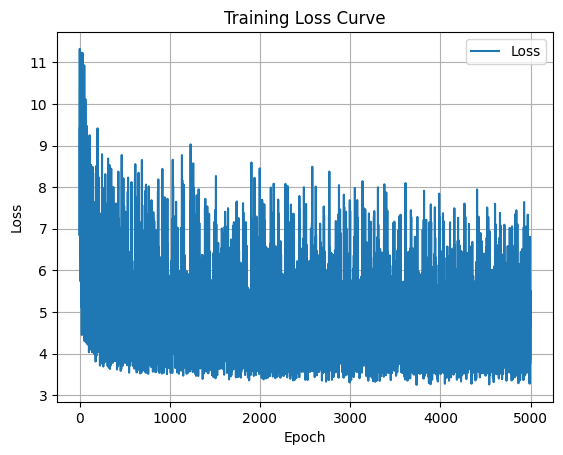

In [19]:
plt.plot(softmax_reg.losses, label="Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('Training Loss Curve')
plt.legend()
plt.grid()
plt.show()